## DBSCAN Clustering | Full Case-Study (Wholesale Customers)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

#### Importing and Inspecting Data

In [2]:
df = pd.read_csv(r'G:\Udemy Courses Files\Python Machine Learning Diploma\3-clustering-materials\datasets\wholesale-customers-data.csv')

In [3]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


#### Exploring Data

<Axes: xlabel='Milk', ylabel='Grocery'>

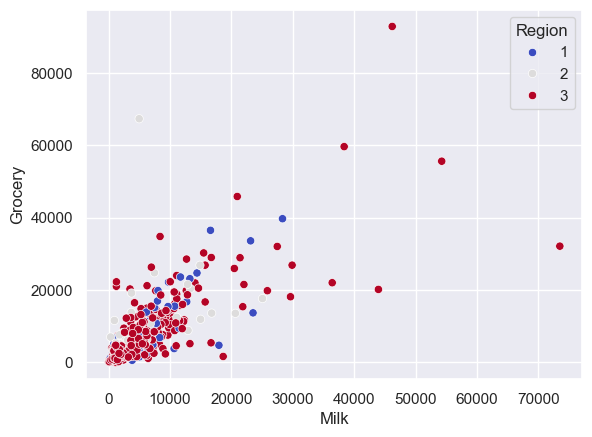

In [4]:
sns.scatterplot(data=df,x='Milk', y='Grocery', palette='coolwarm', hue='Region')

In [5]:
df.drop(['Channel','Region'], axis=1).corr()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Fresh,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicassen,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


=> There is a corelation between Milk and Grocery (0.728335)

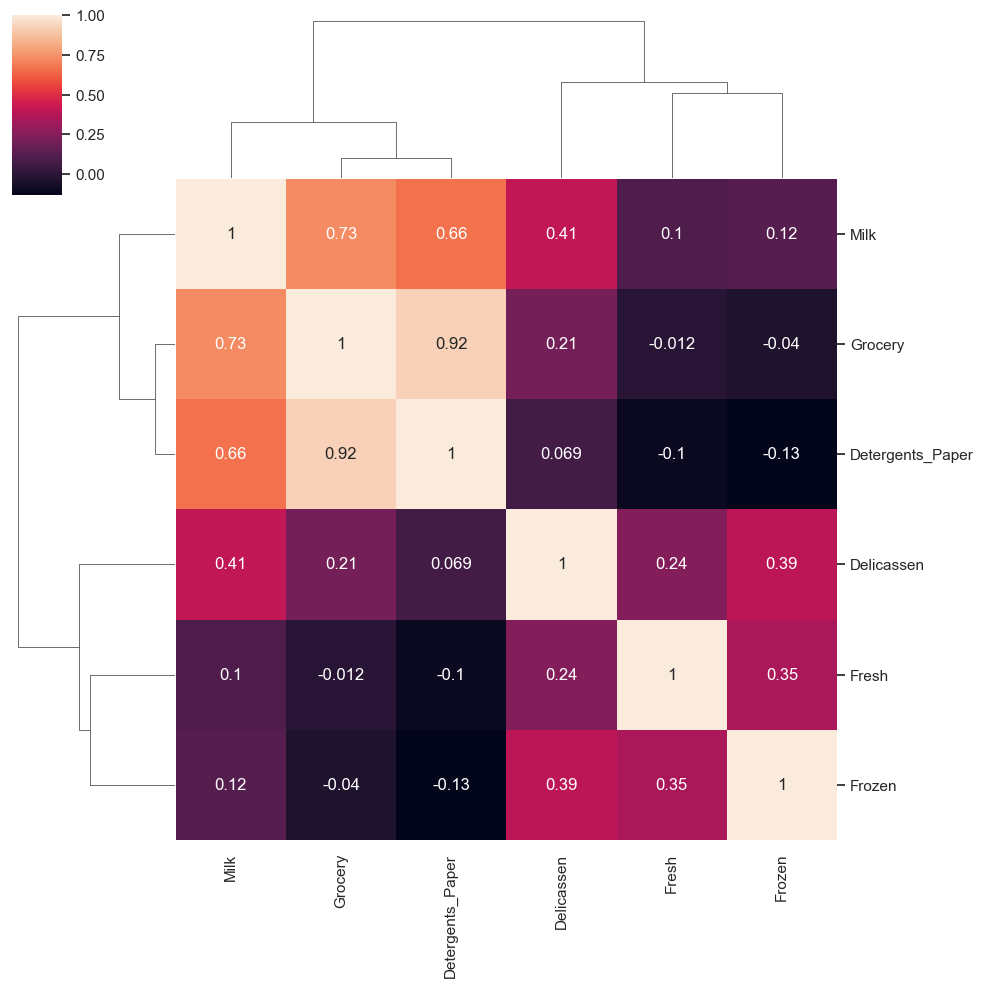

In [6]:
sns.clustermap(df.drop(['Channel','Region'], axis=1).corr(),annot=True)

#### Pre-processing Data

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
sc = StandardScaler()

In [9]:
scaled_X = sc.fit_transform(df)
scaled_X

array([[ 1.44865163,  0.59066829,  0.05293319, ..., -0.58936716,
        -0.04356873, -0.06633906],
       [ 1.44865163,  0.59066829, -0.39130197, ..., -0.27013618,
         0.08640684,  0.08915105],
       [ 1.44865163,  0.59066829, -0.44702926, ..., -0.13753572,
         0.13323164,  2.24329255],
       ...,
       [ 1.44865163,  0.59066829,  0.20032554, ..., -0.54337975,
         2.51121768,  0.12145607],
       [-0.69029709,  0.59066829, -0.13538389, ..., -0.41944059,
        -0.56977032,  0.21304614],
       [-0.69029709,  0.59066829, -0.72930698, ..., -0.62009417,
        -0.50488752, -0.52286938]])

#### Model Building and Prediction

##### DBSCAN with Chosen Value of Epsilon

In [10]:
from sklearn.cluster import DBSCAN

In [11]:
model = DBSCAN(eps=2, min_samples=5)

In [19]:
model.fit(scaled_X)

DBSCAN(eps=2)

In [13]:
model.labels_   # Cluster labels for each point in the dataset given to fit(). Noisy samples are given the label -1.

array([ 0,  0,  0,  1,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  1,  0,
        1,  0,  1,  0,  1,  1, -1,  0,  0,  1,  1,  0,  1,  1,  1,  1,  1,
        1,  0,  1,  0,  0,  1,  1,  1,  0,  0,  0,  0,  0, -1,  0,  0,  1,
        1,  0,  0,  1,  1,  0,  0,  1,  1,  0, -1,  0,  0,  1, -1,  1,  0,
        1,  1,  1, -1,  1,  0,  0,  1,  1,  0,  1,  1,  1,  0,  0,  1,  0,
       -1, -1, -1,  1,  1,  1,  1, -1, -1,  0,  1,  0,  1,  1,  1,  0,  0,
        0,  1,  1,  1,  0,  0,  0,  0,  1,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  0,  1, -1,  1,  0,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  0,  0,  1,  0,  0,  0,  1,  1,  0,  0,  0,  0,  1,  1,  1,
        0,  0,  1,  0,  1,  0,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1,
        1,  0,  0,  1,  1,  1,  0,  1,  1,  1,  0,  1,  1,  0,  0,  1,  1,
        1,  0,  1,  0,  1,  0,  1, -1,  1,  1,  0,  1,  0,  1,  0,  1,  1,
        1,  1,  0,  1,  1

In [36]:
# Count the values of array
np.unique(model.labels_, return_counts=True)

(array([-1,  0,  1], dtype=int64), array([ 17, 132, 291], dtype=int64))

In [33]:
set(model.labels_)

{-1, 0, 1}

In [34]:
len(set(model.labels_))

3

In [37]:
sum(model.labels_ == -1)

17

In [54]:
len(model.labels_ )

440

<Axes: xlabel='Milk', ylabel='Grocery'>

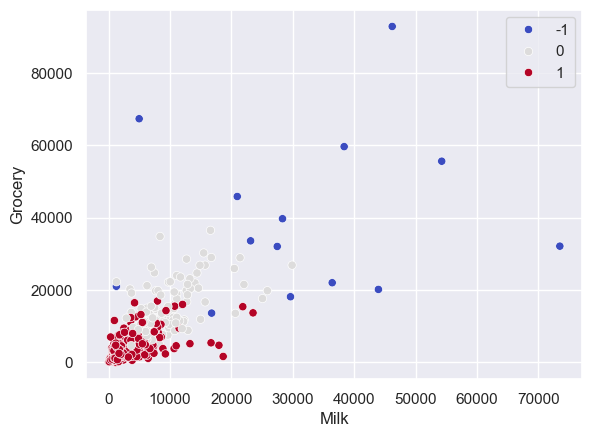

In [23]:
sns.scatterplot(data=df,x='Milk', y='Grocery', palette='coolwarm', hue=model.labels_)

In [24]:
df['clusters'] = model.labels_
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,clusters
0,2,3,12669,9656,7561,214,2674,1338,0
1,2,3,7057,9810,9568,1762,3293,1776,0
2,2,3,6353,8808,7684,2405,3516,7844,0
3,1,3,13265,1196,4221,6404,507,1788,1
4,2,3,22615,5410,7198,3915,1777,5185,0
...,...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204,1
436,1,3,39228,1431,764,4510,93,2346,1
437,2,3,14531,15488,30243,437,14841,1867,0
438,1,3,10290,1981,2232,1038,168,2125,1


In [29]:
df[df['clusters'] == -1]      # Noisy samples (Outliers)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,clusters
23,2,3,26373,36423,22019,5154,4337,16523,-1
47,2,3,44466,54259,55571,7782,24171,6465,-1
61,2,3,35942,38369,59598,3254,26701,2017,-1
65,2,3,85,20959,45828,36,24231,1423,-1
71,1,3,18291,1266,21042,5373,4173,14472,-1
85,2,3,16117,46197,92780,1026,40827,2944,-1
86,2,3,22925,73498,32114,987,20070,903,-1
87,1,3,43265,5025,8117,6312,1579,14351,-1
92,2,3,9198,27472,32034,3232,18906,5130,-1
93,1,3,11314,3090,2062,35009,71,2698,-1


In [ ]:
# Count the values of array
np.unique(model.labels_, return_counts=True)

#### DBSCAN with Unknown Value of Epsilon

In [40]:
noise_percentage = []

for epsilon in np.linspace(0.001, 3, 50):
    model = DBSCAN(eps=epsilon, min_samples=5)
    model.fit(scaled_X)   
    noise_percentage.append((np.sum(model.labels_ == -1) / len(model.labels_)) * 100)

noise_percentage

[100.0,
 100.0,
 100.0,
 98.86363636363636,
 91.36363636363637,
 82.5,
 77.04545454545455,
 70.0,
 62.272727272727266,
 52.04545454545455,
 42.27272727272727,
 34.31818181818182,
 30.909090909090907,
 27.500000000000004,
 23.863636363636363,
 22.954545454545457,
 20.227272727272727,
 18.181818181818183,
 16.136363636363637,
 14.772727272727273,
 13.18181818181818,
 12.727272727272727,
 11.59090909090909,
 10.909090909090908,
 10.681818181818182,
 9.545454545454547,
 8.863636363636363,
 7.727272727272727,
 6.59090909090909,
 5.681818181818182,
 5.454545454545454,
 5.454545454545454,
 4.090909090909091,
 3.8636363636363633,
 3.6363636363636362,
 3.6363636363636362,
 3.4090909090909087,
 3.1818181818181817,
 3.1818181818181817,
 3.1818181818181817,
 3.1818181818181817,
 3.1818181818181817,
 2.9545454545454546,
 2.727272727272727,
 2.727272727272727,
 2.727272727272727,
 2.727272727272727,
 2.727272727272727,
 2.727272727272727,
 2.727272727272727]

In [41]:
min(noise_percentage)

2.727272727272727

##### => The best value for epsilon is at the min noise(outlier) percentage

([<matplotlib.axis.YTick at 0x25af3157b10>,
 [Text(0, 0, '0'),
  Text(0, 10, '10'),
  Text(0, 20, '20'),
  Text(0, 30, '30'),
  Text(0, 40, '40'),
  Text(0, 50, '50'),
  Text(0, 60, '60'),
  Text(0, 70, '70'),
  Text(0, 80, '80'),
  Text(0, 90, '90')])

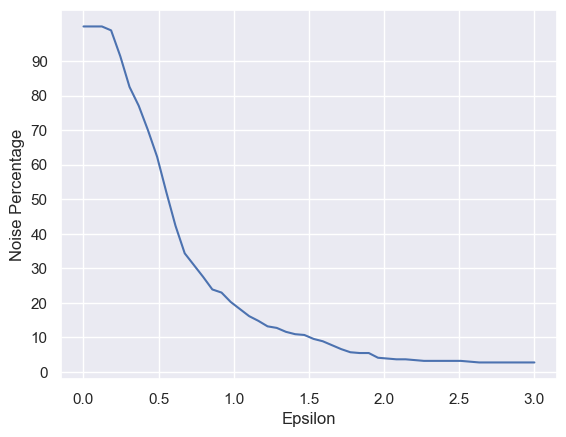

In [51]:
sns.lineplot(x=np.linspace(0.001, 3, 50), y=noise_percentage)
plt.xlabel('Epsilon')
plt.ylabel('Noise Percentage')
#plt.yticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])

plt.yticks(np.arange(0, 100, step=10))

#### => So we can make epsilon = 2  (Saturation starts from 2)

### ***Thank You***